Note: The analysis has been done on the Benchmark Data provided on 18th April 2016.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import pylab 

import seaborn as sns

# This allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data_6thMay2016/LinearSVC_cleaned.tsv.gz')
#Cleaned_Data.head()

In [4]:
Cleaned_Data.shape

(722399, 8)

In [3]:
Cleaned_Data['penalty_categorical'] = Cleaned_Data.penalty.map({'l1':0, 'l2':1})
#Cleaned_Data.head()

In [4]:
Cleaned_Data['loss_categorical'] = Cleaned_Data.loss.map({'hinge':0, 'squared_hinge':1})
#Cleaned_Data.head()

# Plot parameters against test scores

In [5]:
Param1=Cleaned_Data['tol'].unique().tolist()
#Param1

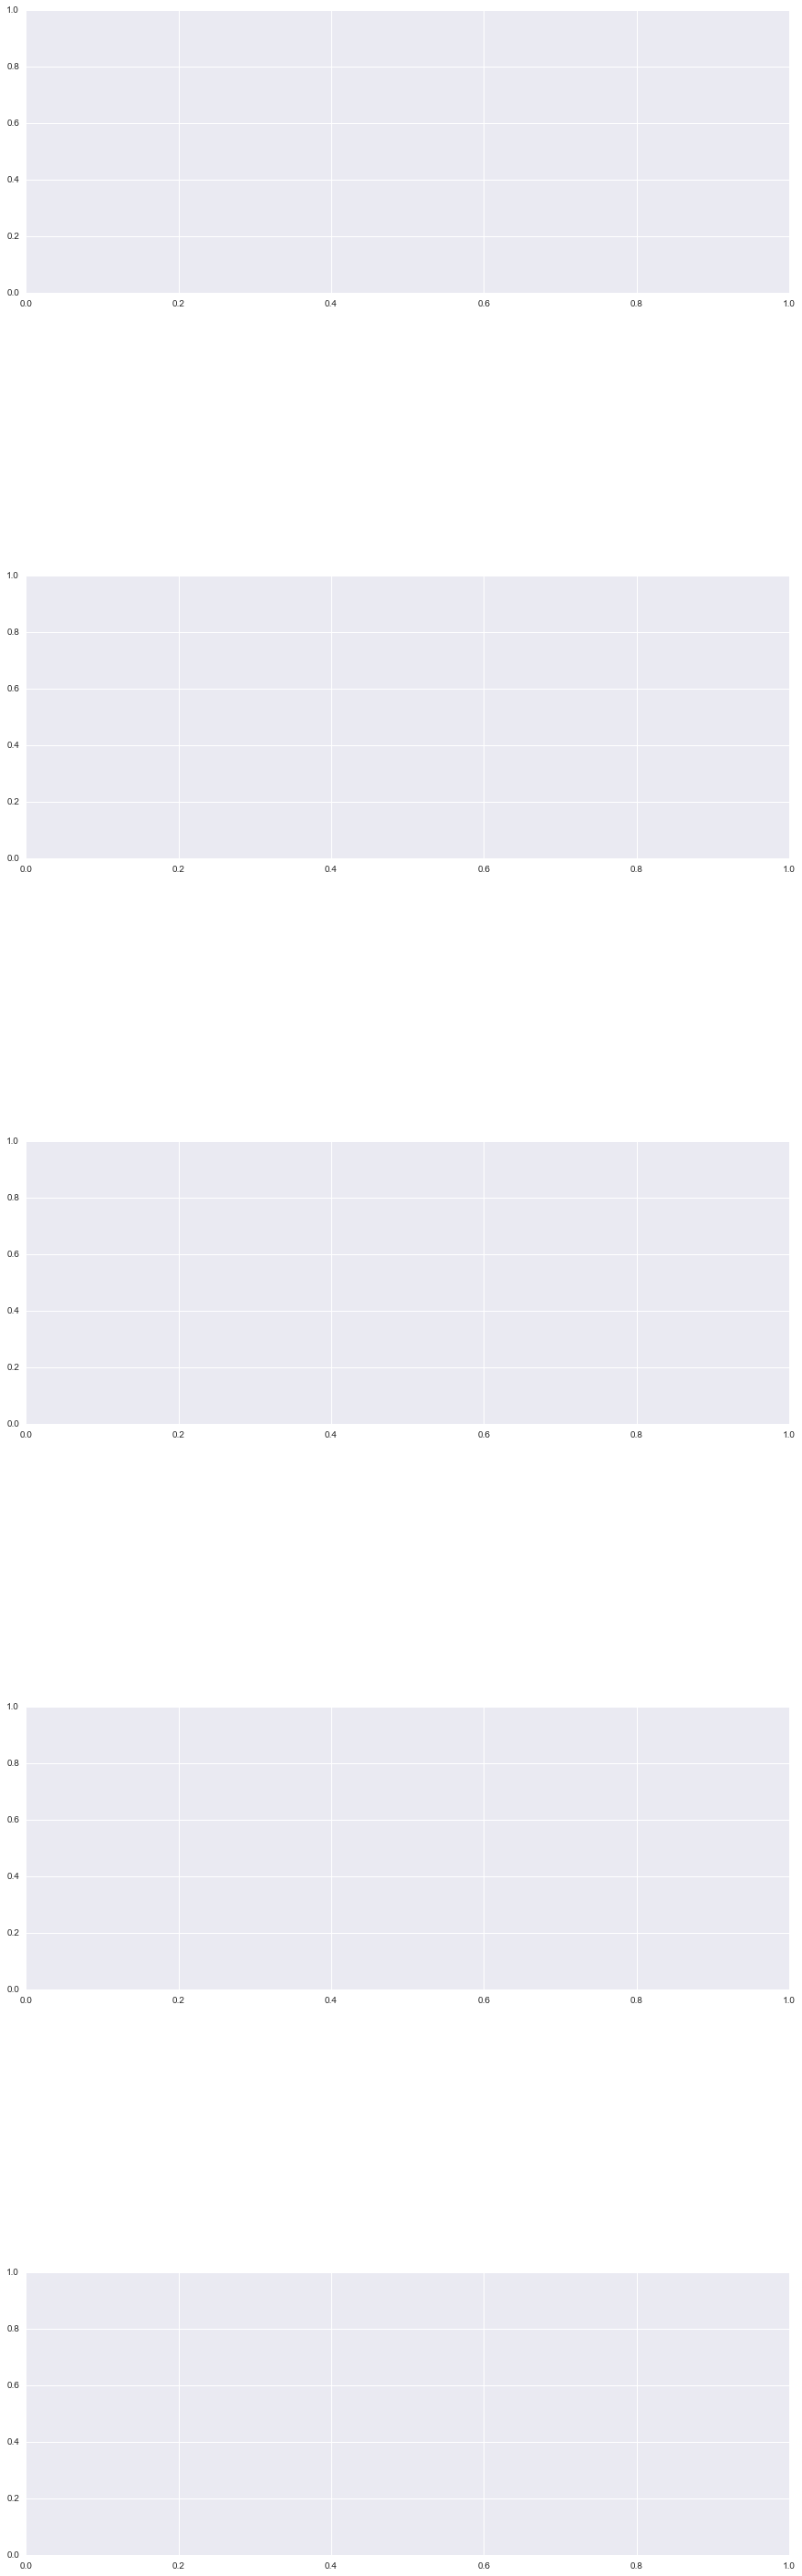

In [6]:

sns.set()
fig, axs = plt.subplots(5,1, sharey=True, figsize=(15,50)) # 3 rows 1 column, figsize controls how big I want the fig to look
fig.subplots_adjust(hspace=1) # Give space between the subplots

#boxplots
#uncomment this to see the box-plots
#sns.boxplot(data=Cleaned_Data, x='C', y='Test_Score', notch='T',ax=axs[0])  
#sns.boxplot(data=Cleaned_Data, x='loss', y='Test_Score', notch='T',ax=axs[1])
#sns.boxplot(data=Cleaned_Data, x='penalty', y='Test_Score', notch='T',ax=axs[2])
#sns.boxplot(data=Cleaned_Data, x='dual', y='Test_Score', notch='T',ax=axs[3])
#sns.boxplot(data=Cleaned_Data, x='tol', y='Test_Score', notch='T',ax=axs[4])

Analysis:
Its very hard to draw any conclusions out of this since the plots are very similar in nature.
Probably a value of C=0.001 is the least effective out of the lot.
Squared-hinge performs slightly better than hinge loss.
l1 and l2 penalty almost give similar results.
dual = false, performs slightly better than dual = true.
All tol values give almost the same test_score distribution.

# Linear Regression on combined dataset

In [7]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Test_Score ~ C + loss + penalty + dual + tol', data=Cleaned_Data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Test_Score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     104.2
Date:                Tue, 24 May 2016   Prob (F-statistic):          2.63e-110
Time:                        10:46:06   Log-Likelihood:             1.6682e+05
No. Observations:              722399   AIC:                        -3.336e+05
Df Residuals:                  722393   BIC:                        -3.336e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 0.7396      0.001    916.734      0.000         0.738     0.741
loss[T.squared_hinge]     0.0091      0.001     14.204      0.000         0.008     0.010
penalty[T.l2]             0.0085      0.001     13.294      0.000         0.007     0.010
dual[T.True]             -0.0051      0.001     -7.934      0.000        -0.006    -0.004
C                     -7.685e-06   6.35e-06     -1.211      0.226     -2.01e-05  4.76e-06
tol                      -0.0029      0.006     -0.507      0.612        -0.014     0.008
==============================================================================
Omnibus:                    62713.215   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80609.428
Skew:                          -0.815   Prob(JB):                         0.00
Kurtosis:                       3.138   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analysis:
R square value is very low! 
Noticeably the C parameter is weighed more than the other parameters. C=1.0 has highest weights while C=100 has the lowest. Note: This is on the basis that C=0.001 has the coefficient value of 0.
Weights for dual and tol are negative.

# Dividing the dataframe into independent data sets

In [8]:
Dataset_list=Cleaned_Data['Dataset_Name'].unique().tolist()
print(len(Dataset_list))
DatasetWiseData={}
for Dataset_name in Dataset_list:
    DatasetWiseData[Dataset_name] = Cleaned_Data[Cleaned_Data.Dataset_Name==Dataset_name]

172


# At the end of this cell we get the box-plots for each parameter dataset wise vs the mean of test_scores for duplicate parameter combinations :)

In [9]:
datasetData = {}
meanScores = {}

for Dataset_name in Dataset_list:
    datasetData = DatasetWiseData[Dataset_name]
    #get the mean of duplicated parameter combinations 
    meanScores[Dataset_name] = datasetData.groupby(['C','tol', 'loss_categorical', 'penalty_categorical', 'dual'],
                                     as_index = False)['Test_Score', 'Dataset_Name'].mean()
    #uncomment this for viewing the results
    #plt.figure()   
    #sns.boxplot(data=meanScores[Dataset_name], x='C', y='Test_Score', notch='T')
    #sns.plt.title(Dataset_name)
    #plt.figure() 
    #sns.boxplot(data=meanScores[Dataset_name], x='dual', y='Test_Score', notch='T')
    #plt.figure() 
    #sns.boxplot(data=meanScores[Dataset_name], x='tol', y='Test_Score', notch='T')
    #plt.figure() 
    #sns.boxplot(data=meanScores[Dataset_name], x='loss_categorical', y='Test_Score', notch='T')
    #plt.figure() 
    #sns.boxplot(data=meanScores[Dataset_name], x='penalty_categorical', y='Test_Score', notch='T')
    #lm = smf.ols(formula='Test_Score ~ C + loss_categorical + penalty_categorical + dual + tol', data=meanScores[Dataset_name]).fit()
    #print(lm.summary())